<a href="https://colab.research.google.com/github/rofal-gg/achsony/blob/main/Evaluasi_Sentimen_Komentar_Facebook_Terhadap_Menkue_Purbaya_Bongkar_Kesalahan_KDM_Menggunakan_Metode_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[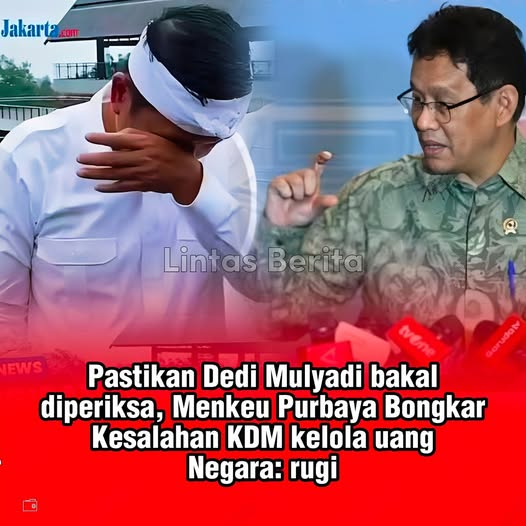link text](https://)

# ***PREPROCESSING DATA***

In [ ]:
import pandas as pd

data = pd.read_csv("dataset_facebook-comments-scraper_2025-10-26_05-29-27-957.csv")
data.info()
data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1432 entries, 0 to 1431
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   postTitle        1432 non-null   object 
 1   postDescription  0 non-null      float64
 2   text             1422 non-null   object 
 3   likesCount       1432 non-null   int64  
 4   facebookUrl      1432 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 56.1+ KB


postTitle  postDescription  \
0  Menteri Keuangan (Menkeu) Purbaya Yudhi Sadewa...              NaN   
1  Menteri Keuangan (Menkeu) Purbaya Yudhi Sadewa...              NaN   
2  Menteri Keuangan (Menkeu) Purbaya Yudhi Sadewa...              NaN   
3  Menteri Keuangan (Menkeu) Purbaya Yudhi Sadewa...              NaN   
4  Menteri Keuangan (Menkeu) Purbaya Yudhi Sadewa...              NaN   

                                                text  likesCount  \
0  Santun dan berikanlah komen yg real.jgn mengad...          70   
1  Yg bikin berita salah.\nYg bikin berita pemben...         301   
2  Dua" nya orang Sunda \nDua" nya pemimpin yang ...         119   
3           Dua2nya orang hebat, Pak Purbaya dan KDM         122   
4  min sepertinya anglenya gak sejauh itu deh ......          57   

                                    facebookUrl  
0  https://www.facebook.com/share/p/16yXibjztQ/  
1  https://www.facebook.com/share/p/16yXibjztQ/  
2  https://www.facebook.com/share/p/16yXibjztQ/  
3  https://www.facebook.com/share/p/16yXibjztQ/  
4  https://www.facebook.com/share/p/16yXibjztQ/

In [ ]:
df  = pd.DataFrame(data[['text']])
df.head(10)

text
0  Santun dan berikanlah komen yg real.jgn mengad...
1  Yg bikin berita salah.\nYg bikin berita pemben...
2  Dua" nya orang Sunda \nDua" nya pemimpin yang ...
3           Dua2nya orang hebat, Pak Purbaya dan KDM
4  min sepertinya anglenya gak sejauh itu deh ......
5  Kasihan pa dedi,pa dedi satu²nya gubernur yg m...
6  Biasa lah itu berita sll d besar besar kan apa...
7  Biasa kalo ada pemimpin dan pejabat yg baik su...
8  Ngak ngaruh, klu Dedi calon presiden saya pili...
9  Orang bener di benturkan...sang pembenci terta...

**PROSES HAPUS DATA DUPLIKAT**

---



In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1432 entries, 0 to 1431
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1422 non-null   object
dtypes: object(1)
memory usage: 11.3+ KB


text
0  Santun dan berikanlah komen yg real.jgn mengad...
1  Yg bikin berita salah.\nYg bikin berita pemben...
2  Dua" nya orang Sunda \nDua" nya pemimpin yang ...
3           Dua2nya orang hebat, Pak Purbaya dan KDM
4  min sepertinya anglenya gak sejauh itu deh ......

In [ ]:
#jumlah data duplikat
data = df[df.duplicated(subset="text", keep=False)]
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 56 entries, 1 to 1429
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    46 non-null     object
dtypes: object(1)
memory usage: 896.0+ bytes


text
1    Yg bikin berita salah.\nYg bikin berita pemben...
26                                   Tepercaya aing mh
27   Mungkin KDM terlalu banyak konten sampai dia lupa
35                                           Adu domba
121                                          Adu domba

In [ ]:
#hapus duplikast data
df.drop_duplicates(subset ="text", inplace = True)
df.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1392 entries, 0 to 1431
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1391 non-null   object
dtypes: object(1)
memory usage: 21.8+ KB


text
1    Yg bikin berita salah.\nYg bikin berita pemben...
26                                   Tepercaya aing mh
27   Mungkin KDM terlalu banyak konten sampai dia lupa
35                                           Adu domba
121                                          Adu domba

**PROSES CLEANING**

---



In [ ]:
import re
import string
import nltk

# Fungsi untuk menghapus URL
def remove_URL(tweet):
    if tweet is not None and isinstance(tweet, str):
        url = re.compile(r'https?://\S+|www\.\S+')
        return url.sub(r'', tweet)
    else:
        return tweet


# Fungsi untuk menghapus emoji
def remove_emoji(tweet):
    if tweet is not None and isinstance(tweet, str):
        emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F700-\U0001F77F"  # alchemical symbols
            u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
            u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
            u"\U0001FA00-\U0001FA6F"  # Chess Symbols
            u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
            u"\U0001F004-\U0001F0CF"  # Additional emoticons
            u"\U0001F1E0-\U0001F1FF"  # flags
                               "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', tweet)
    else:
        return tweet

# Fungsi untuk menghapus simbol
def remove_symbols(tweet):
    if tweet is not None and isinstance(tweet, str):
        tweet = re.sub(r'[^a-zA-Z0-9\s]', '', tweet)
    return tweet

# Fungsi untuk menghapus angka
def remove_numbers(tweet):
    if tweet is not None and isinstance(tweet, str):
        tweet = re.sub(r'\d', '', tweet)
    return tweet

# Fungsi hapus username
def remove_usernames(text):
    if text is not None and isinstance(text, str):
        return re.sub(r'@\w+', '', text)
    else:
        return text

df['cleaning'] = df['text'].apply(lambda x: remove_URL(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_usernames(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_emoji(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_symbols(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_numbers(x))

df.head(5)

text  \
0  Santun dan berikanlah komen yg real.jgn mengad...   
1  Yg bikin berita salah.\nYg bikin berita pemben...   
2  Dua" nya orang Sunda \nDua" nya pemimpin yang ...   
3           Dua2nya orang hebat, Pak Purbaya dan KDM   
4  min sepertinya anglenya gak sejauh itu deh ......   

                                            cleaning  
0  Santun dan berikanlah komen yg realjgn mengada...  
1  Yg bikin berita salah\nYg bikin berita pembenc...  
2  Dua nya orang Sunda \nDua nya pemimpin yang he...  
3             Duanya orang hebat Pak Purbaya dan KDM  
4  min sepertinya anglenya gak sejauh itu deh nor...

**PROSES CASE FOLDING**

---



In [ ]:
def case_folding(text):
    if isinstance(text, str):
        lowercase_text = text.lower()
        return lowercase_text
    else:
        return text

df['case_folding'] = df['cleaning'].apply(case_folding)
df.head(5)

text  \
0  Santun dan berikanlah komen yg real.jgn mengad...   
1  Yg bikin berita salah.\nYg bikin berita pemben...   
2  Dua" nya orang Sunda \nDua" nya pemimpin yang ...   
3           Dua2nya orang hebat, Pak Purbaya dan KDM   
4  min sepertinya anglenya gak sejauh itu deh ......   

                                            cleaning  \
0  Santun dan berikanlah komen yg realjgn mengada...   
1  Yg bikin berita salah\nYg bikin berita pembenc...   
2  Dua nya orang Sunda \nDua nya pemimpin yang he...   
3             Duanya orang hebat Pak Purbaya dan KDM   
4  min sepertinya anglenya gak sejauh itu deh nor...   

                                        case_folding  
0  santun dan berikanlah komen yg realjgn mengada...  
1  yg bikin berita salah\nyg bikin berita pembenc...  
2  dua nya orang sunda \ndua nya pemimpin yang he...  
3             duanya orang hebat pak purbaya dan kdm  
4  min sepertinya anglenya gak sejauh itu deh nor...

**Normalisasi Kata**

---



In [ ]:
import pandas as pd
import requests
from io import BytesIO

# Fungsi penggantian kata tidak baku
def replace_taboo_words(text, kamus_tidak_baku):
    if isinstance(text, str):
        words = text.split()
        replaced_words = []
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

        for word in words:
            if word in kamus_tidak_baku:
                baku_word = kamus_tidak_baku[word]
                if isinstance(baku_word, str) and all(char.isalpha() for char in baku_word):
                    replaced_words.append(baku_word)
                    kalimat_baku.append(baku_word)
                    kata_diganti.append(word)
                    kata_tidak_baku_hash.append(hash(word))
            else:
                replaced_words.append(word)
        replaced_text = ' '.join(replaced_words)
    else:
        replaced_text = ''
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

    return replaced_text, kalimat_baku, kata_diganti, kata_tidak_baku_hash

# Baca dataset kamu (pastikan df sudah tersedia)
data = pd.DataFrame(df[['text','cleaning','case_folding']])
data.head()

text  \
0  Santun dan berikanlah komen yg real.jgn mengad...   
1  Yg bikin berita salah.\nYg bikin berita pemben...   
2  Dua" nya orang Sunda \nDua" nya pemimpin yang ...   
3           Dua2nya orang hebat, Pak Purbaya dan KDM   
4  min sepertinya anglenya gak sejauh itu deh ......   

                                            cleaning  \
0  Santun dan berikanlah komen yg realjgn mengada...   
1  Yg bikin berita salah\nYg bikin berita pembenc...   
2  Dua nya orang Sunda \nDua nya pemimpin yang he...   
3             Duanya orang hebat Pak Purbaya dan KDM   
4  min sepertinya anglenya gak sejauh itu deh nor...   

                                        case_folding  
0  santun dan berikanlah komen yg realjgn mengada...  
1  yg bikin berita salah\nyg bikin berita pembenc...  
2  dua nya orang sunda \ndua nya pemimpin yang he...  
3             duanya orang hebat pak purbaya dan kdm  
4  min sepertinya anglenya gak sejauh itu deh nor...

In [ ]:
# Unduh dan baca kamus dari GitHub
url = "https://github.com/analysisdatasentiment/kamus_kata_baku/raw/main/kamuskatabaku.xlsx"
response = requests.get(url)
file_excel = BytesIO(response.content)
kamus_data = pd.read_excel(file_excel)

# Buat dictionary dari kamus
kamus_tidak_baku_dict = dict(zip(kamus_data['tidak_baku'], kamus_data['kata_baku']))

In [ ]:
# Terapkan fungsi normalisasi
data[['normalisasi', 'Kata_Baku', 'Kata_Tidak_Baku', 'Kata_Tidak_Baku_Hash']] = data['case_folding'].apply(
    lambda x: pd.Series(replace_taboo_words(x, kamus_tidak_baku_dict))
)

# Ambil kolom yang relevan
df = pd.DataFrame(data[['text','cleaning','case_folding','normalisasi']])
df.head(5)

text  \
0  Santun dan berikanlah komen yg real.jgn mengad...   
1  Yg bikin berita salah.\nYg bikin berita pemben...   
2  Dua" nya orang Sunda \nDua" nya pemimpin yang ...   
3           Dua2nya orang hebat, Pak Purbaya dan KDM   
4  min sepertinya anglenya gak sejauh itu deh ......   

                                            cleaning  \
0  Santun dan berikanlah komen yg realjgn mengada...   
1  Yg bikin berita salah\nYg bikin berita pembenc...   
2  Dua nya orang Sunda \nDua nya pemimpin yang he...   
3             Duanya orang hebat Pak Purbaya dan KDM   
4  min sepertinya anglenya gak sejauh itu deh nor...   

                                        case_folding  \
0  santun dan berikanlah komen yg realjgn mengada...   
1  yg bikin berita salah\nyg bikin berita pembenc...   
2  dua nya orang sunda \ndua nya pemimpin yang he...   
3             duanya orang hebat pak purbaya dan kdm   
4  min sepertinya anglenya gak sejauh itu deh nor...   

                                         normalisasi  
0  santun dan berikanlah komen yang realjgn menga...  
1  yang bikin berita salah yang bikin berita pemb...  
2  dua ya orang sunda dua ya pemimpin yang hebat ...  
3             duanya orang hebat pak purbaya dan kdm  
4  min sepertinya anglenya tidak sejauh itu deh n...

**TOKENIZATION**

---



In [ ]:
def tokenize(text):
    tokens = text.split()
    return tokens

df['tokenize'] = df['normalisasi'].apply(tokenize)

df.head(5)

text  \
0  Santun dan berikanlah komen yg real.jgn mengad...   
1  Yg bikin berita salah.\nYg bikin berita pemben...   
2  Dua" nya orang Sunda \nDua" nya pemimpin yang ...   
3           Dua2nya orang hebat, Pak Purbaya dan KDM   
4  min sepertinya anglenya gak sejauh itu deh ......   

                                            cleaning  \
0  Santun dan berikanlah komen yg realjgn mengada...   
1  Yg bikin berita salah\nYg bikin berita pembenc...   
2  Dua nya orang Sunda \nDua nya pemimpin yang he...   
3             Duanya orang hebat Pak Purbaya dan KDM   
4  min sepertinya anglenya gak sejauh itu deh nor...   

                                        case_folding  \
0  santun dan berikanlah komen yg realjgn mengada...   
1  yg bikin berita salah\nyg bikin berita pembenc...   
2  dua nya orang sunda \ndua nya pemimpin yang he...   
3             duanya orang hebat pak purbaya dan kdm   
4  min sepertinya anglenya gak sejauh itu deh nor...   

                                         normalisasi  \
0  santun dan berikanlah komen yang realjgn menga...   
1  yang bikin berita salah yang bikin berita pemb...   
2  dua ya orang sunda dua ya pemimpin yang hebat ...   
3             duanya orang hebat pak purbaya dan kdm   
4  min sepertinya anglenya tidak sejauh itu deh n...   

                                            tokenize  
0  [santun, dan, berikanlah, komen, yang, realjgn...  
1  [yang, bikin, berita, salah, yang, bikin, beri...  
2  [dua, ya, orang, sunda, dua, ya, pemimpin, yan...  
3     [duanya, orang, hebat, pak, purbaya, dan, kdm]  
4  [min, sepertinya, anglenya, tidak, sejauh, itu...

**PROSES STOPWORD REMOVAL**

---



In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

# Ubah hasil list jadi string
df['stopword removal'] = df['tokenize'].apply(
    lambda x: " ".join(remove_stopwords(x))
)

df.head(5)

text  \
0  Santun dan berikanlah komen yg real.jgn mengad...   
1  Yg bikin berita salah.\nYg bikin berita pemben...   
2  Dua" nya orang Sunda \nDua" nya pemimpin yang ...   
3           Dua2nya orang hebat, Pak Purbaya dan KDM   
4  min sepertinya anglenya gak sejauh itu deh ......   

                                            cleaning  \
0  Santun dan berikanlah komen yg realjgn mengada...   
1  Yg bikin berita salah\nYg bikin berita pembenc...   
2  Dua nya orang Sunda \nDua nya pemimpin yang he...   
3             Duanya orang hebat Pak Purbaya dan KDM   
4  min sepertinya anglenya gak sejauh itu deh nor...   

                                        case_folding  \
0  santun dan berikanlah komen yg realjgn mengada...   
1  yg bikin berita salah\nyg bikin berita pembenc...   
2  dua nya orang sunda \ndua nya pemimpin yang he...   
3             duanya orang hebat pak purbaya dan kdm   
4  min sepertinya anglenya gak sejauh itu deh nor...   

                                         normalisasi  \
0  santun dan berikanlah komen yang realjgn menga...   
1  yang bikin berita salah yang bikin berita pemb...   
2  dua ya orang sunda dua ya pemimpin yang hebat ...   
3             duanya orang hebat pak purbaya dan kdm   
4  min sepertinya anglenya tidak sejauh itu deh n...   

                                            tokenize  \
0  [santun, dan, berikanlah, komen, yang, realjgn...   
1  [yang, bikin, berita, salah, yang, bikin, beri...   
2  [dua, ya, orang, sunda, dua, ya, pemimpin, yan...   
3     [duanya, orang, hebat, pak, purbaya, dan, kdm]   
4  [min, sepertinya, anglenya, tidak, sejauh, itu...   

                                    stopword removal  
0  santun berikanlah komen realjgn mengada adaked...  
1  bikin berita salah bikin berita pembenci kdm p...  
2  ya orang sunda ya pemimpin hebat jujur berhara...  
3                     duanya orang hebat purbaya kdm  
4  min anglenya deh normal normal beritanya menda...

In [ ]:
from collections import Counter

all_text = ' '.join(df['stopword removal'].astype(str))
all_text = re.sub(r'[^a-zA-Z\s]', '', all_text.lower())

word_list = all_text.split()
word_freq = Counter(word_list)

sorted_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
df_freq = pd.DataFrame(sorted_freq, columns=['Kata', 'Frekuensi'])

df_freq.to_csv('frekuensi_kata_awal.csv', index=False)
print("✅ File 'frekuensi_kata_awal.csv' berhasil disimpan.")
df_freq.info()
df_freq.head(50)

✅ File 'frekuensi_kata_awal.csv' berhasil disimpan.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3930 entries, 0 to 3929
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Kata       3930 non-null   object
 1   Frekuensi  3930 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 61.5+ KB


Kata  Frekuensi
0         kdm        354
1      berita        336
2       orang        290
3          ya        266
4       bikin        186
5     purbaya        155
6       domba        128
7      rakyat        117
8         adu        109
9        uang         98
10        bpk         84
11      salah         75
12       hoax         68
13     konten         65
14     negara         64
15       dedi         61
16       biar         57
17       aing         57
18     daerah         56
19   gubernur         55
20      jabar         55
21  indonesia         50
22       hati         50
23    periksa         49
24        nih         48
25      hebat         47
26      pakai         47
27    pejabat         47
28   keuangan         46
29    korupsi         43
30      jujur         41
31      kayak         39
32    mengadu         39
33       akun         37
34        mah         37
35       cari         37
36       data         36
37       bank         34
38    percaya         34
39     menkeu         34
40     mentri         34
41     fitnah         33
42       suka         32
43       dana         32
44        sih         32
45  postingan         31
46     narasi         30
47        tau         30
48         nu         30
49   pembenci         29

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1392 entries, 0 to 1431
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   text              1391 non-null   object
 1   cleaning          1391 non-null   object
 2   case_folding      1391 non-null   object
 3   normalisasi       1392 non-null   object
 4   tokenize          1392 non-null   object
 5   stopword removal  1392 non-null   object
dtypes: object(6)
memory usage: 76.1+ KB


text  \
0  Santun dan berikanlah komen yg real.jgn mengad...   
1  Yg bikin berita salah.\nYg bikin berita pemben...   
2  Dua" nya orang Sunda \nDua" nya pemimpin yang ...   
3           Dua2nya orang hebat, Pak Purbaya dan KDM   
4  min sepertinya anglenya gak sejauh itu deh ......   

                                            cleaning  \
0  Santun dan berikanlah komen yg realjgn mengada...   
1  Yg bikin berita salah\nYg bikin berita pembenc...   
2  Dua nya orang Sunda \nDua nya pemimpin yang he...   
3             Duanya orang hebat Pak Purbaya dan KDM   
4  min sepertinya anglenya gak sejauh itu deh nor...   

                                        case_folding  \
0  santun dan berikanlah komen yg realjgn mengada...   
1  yg bikin berita salah\nyg bikin berita pembenc...   
2  dua nya orang sunda \ndua nya pemimpin yang he...   
3             duanya orang hebat pak purbaya dan kdm   
4  min sepertinya anglenya gak sejauh itu deh nor...   

                                         normalisasi  \
0  santun dan berikanlah komen yang realjgn menga...   
1  yang bikin berita salah yang bikin berita pemb...   
2  dua ya orang sunda dua ya pemimpin yang hebat ...   
3             duanya orang hebat pak purbaya dan kdm   
4  min sepertinya anglenya tidak sejauh itu deh n...   

                                            tokenize  \
0  [santun, dan, berikanlah, komen, yang, realjgn...   
1  [yang, bikin, berita, salah, yang, bikin, beri...   
2  [dua, ya, orang, sunda, dua, ya, pemimpin, yan...   
3     [duanya, orang, hebat, pak, purbaya, dan, kdm]   
4  [min, sepertinya, anglenya, tidak, sejauh, itu...   

                                    stopword removal  
0  santun berikanlah komen realjgn mengada adaked...  
1  bikin berita salah bikin berita pembenci kdm p...  
2  ya orang sunda ya pemimpin hebat jujur berhara...  
3                     duanya orang hebat purbaya kdm  
4  min anglenya deh normal normal beritanya menda...

In [ ]:
hapus_kata = ['ya','adu','aing','nih','mah','sih','tau','nu']

# hapus kata dari teks
df['stopword removal'] = df['stopword removal'].apply(
    lambda x: ' '.join([kata for kata in x.split() if kata not in hapus_kata]))

df['stopword removal'].str.contains('|'.join(hapus_kata)).sum()
df.head()

text  \
0  Santun dan berikanlah komen yg real.jgn mengad...   
1  Yg bikin berita salah.\nYg bikin berita pemben...   
2  Dua" nya orang Sunda \nDua" nya pemimpin yang ...   
3           Dua2nya orang hebat, Pak Purbaya dan KDM   
4  min sepertinya anglenya gak sejauh itu deh ......   

                                            cleaning  \
0  Santun dan berikanlah komen yg realjgn mengada...   
1  Yg bikin berita salah\nYg bikin berita pembenc...   
2  Dua nya orang Sunda \nDua nya pemimpin yang he...   
3             Duanya orang hebat Pak Purbaya dan KDM   
4  min sepertinya anglenya gak sejauh itu deh nor...   

                                        case_folding  \
0  santun dan berikanlah komen yg realjgn mengada...   
1  yg bikin berita salah\nyg bikin berita pembenc...   
2  dua nya orang sunda \ndua nya pemimpin yang he...   
3             duanya orang hebat pak purbaya dan kdm   
4  min sepertinya anglenya gak sejauh itu deh nor...   

                                         normalisasi  \
0  santun dan berikanlah komen yang realjgn menga...   
1  yang bikin berita salah yang bikin berita pemb...   
2  dua ya orang sunda dua ya pemimpin yang hebat ...   
3             duanya orang hebat pak purbaya dan kdm   
4  min sepertinya anglenya tidak sejauh itu deh n...   

                                            tokenize  \
0  [santun, dan, berikanlah, komen, yang, realjgn...   
1  [yang, bikin, berita, salah, yang, bikin, beri...   
2  [dua, ya, orang, sunda, dua, ya, pemimpin, yan...   
3     [duanya, orang, hebat, pak, purbaya, dan, kdm]   
4  [min, sepertinya, anglenya, tidak, sejauh, itu...   

                                    stopword removal  
0  santun berikanlah komen realjgn mengada adaked...  
1  bikin berita salah bikin berita pembenci kdm p...  
2  orang sunda pemimpin hebat jujur berharap pemi...  
3                     duanya orang hebat purbaya kdm  
4  min anglenya deh normal normal beritanya menda...

In [ ]:
# ---  Membuat kamus kata tidak baku -> kata baku
kamus_tidak_baku = {
    'kdm':'dedi mulyadi',
    'bpk':'badan pemeriksa keuangan'

}

def perbaiki_kata(teks):
    kata_list = teks.split()
    hasil = [kamus_tidak_baku.get(kata, kata) for kata in kata_list]
    return ' '.join(hasil)

df['stopword removal'] = df['stopword removal'].astype(str).apply(perbaiki_kata)
df.head(5)

text  \
0  Santun dan berikanlah komen yg real.jgn mengad...   
1  Yg bikin berita salah.\nYg bikin berita pemben...   
2  Dua" nya orang Sunda \nDua" nya pemimpin yang ...   
3           Dua2nya orang hebat, Pak Purbaya dan KDM   
4  min sepertinya anglenya gak sejauh itu deh ......   

                                            cleaning  \
0  Santun dan berikanlah komen yg realjgn mengada...   
1  Yg bikin berita salah\nYg bikin berita pembenc...   
2  Dua nya orang Sunda \nDua nya pemimpin yang he...   
3             Duanya orang hebat Pak Purbaya dan KDM   
4  min sepertinya anglenya gak sejauh itu deh nor...   

                                        case_folding  \
0  santun dan berikanlah komen yg realjgn mengada...   
1  yg bikin berita salah\nyg bikin berita pembenc...   
2  dua nya orang sunda \ndua nya pemimpin yang he...   
3             duanya orang hebat pak purbaya dan kdm   
4  min sepertinya anglenya gak sejauh itu deh nor...   

                                         normalisasi  \
0  santun dan berikanlah komen yang realjgn menga...   
1  yang bikin berita salah yang bikin berita pemb...   
2  dua ya orang sunda dua ya pemimpin yang hebat ...   
3             duanya orang hebat pak purbaya dan kdm   
4  min sepertinya anglenya tidak sejauh itu deh n...   

                                            tokenize  \
0  [santun, dan, berikanlah, komen, yang, realjgn...   
1  [yang, bikin, berita, salah, yang, bikin, beri...   
2  [dua, ya, orang, sunda, dua, ya, pemimpin, yan...   
3     [duanya, orang, hebat, pak, purbaya, dan, kdm]   
4  [min, sepertinya, anglenya, tidak, sejauh, itu...   

                                    stopword removal  
0  santun berikanlah komen realjgn mengada adaked...  
1  bikin berita salah bikin berita pembenci dedi ...  
2  orang sunda pemimpin hebat jujur berharap pemi...  
3            duanya orang hebat purbaya dedi mulyadi  
4  min anglenya deh normal normal beritanya menda...

In [ ]:
from collections import Counter
import re

all_text = ' '.join(df['stopword removal'].astype(str))
all_text = re.sub(r'[^a-zA-Z\s]', '', all_text.lower())

word_list = all_text.split()
word_freq = Counter(word_list)

sorted_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
df_freq = pd.DataFrame(sorted_freq, columns=['Kata', 'Frekuensi'])

# df_freq.info()
df_freq.head(50)

Kata  Frekuensi
0         dedi        415
1      mulyadi        373
2       berita        336
3        orang        290
4        bikin        186
5      purbaya        155
6     keuangan        130
7        domba        128
8       rakyat        117
9         uang         98
10       badan         89
11   pemeriksa         84
12       salah         75
13        hoax         68
14      konten         65
15      negara         64
16        biar         57
17      daerah         56
18    gubernur         55
19       jabar         55
20   indonesia         50
21        hati         50
22     periksa         49
23       hebat         47
24       pakai         47
25     pejabat         47
26     korupsi         43
27       jujur         41
28       kayak         39
29     mengadu         39
30        akun         37
31        cari         37
32        data         36
33        bank         34
34     percaya         34
35      menkeu         34
36      mentri         34
37      fitnah         33
38        suka         32
39        dana         32
40   postingan         31
41      narasi         30
42    pembenci         29
43       media         29
44        kang         29
45  masyarakat         29
46        anak         29
47        hoak         27
48      semoga         26
49       admin         26

**WORDCLOUD SETELAH PREPROCESSING**

---



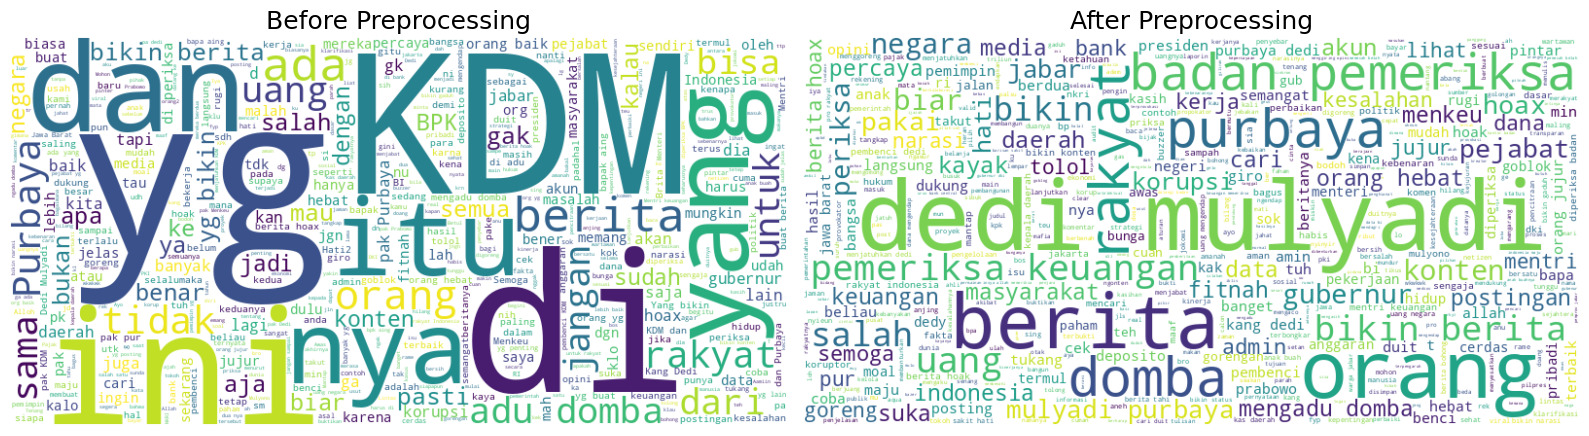

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Buat stopwords tambahan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp', 'lu', 'deh'])

# WordCloud Before (dari kolom 'Review Text')
text_before = ' '.join(
    df['text']
    .astype(str)
    .tolist()
)

wc_before = WordCloud(
    stopwords=stopwords,
    background_color="white",
    max_words=500,
    width=800,
    height=400
).generate(text_before)

# WordCloud After (dari kolom 'stopword removal')
text_after = ' '.join(
    [" ".join(eval(x) if isinstance(x, str) and x.startswith('[') else x.split())
     for x in df['stopword removal'].astype(str)]
)

wc_after = WordCloud(
    stopwords=stopwords,
    background_color="white",
    max_words=500,
    width=800,
    height=400
).generate(text_after)

# Visualisasi side-by-side
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(wc_before, interpolation='bilinear')
plt.axis("off")
plt.title("Before Preprocessing", fontsize=18)

plt.subplot(1, 2, 2)
plt.imshow(wc_after, interpolation='bilinear')
plt.axis("off")
plt.title("After Preprocessing", fontsize=18)

plt.tight_layout()
plt.show()


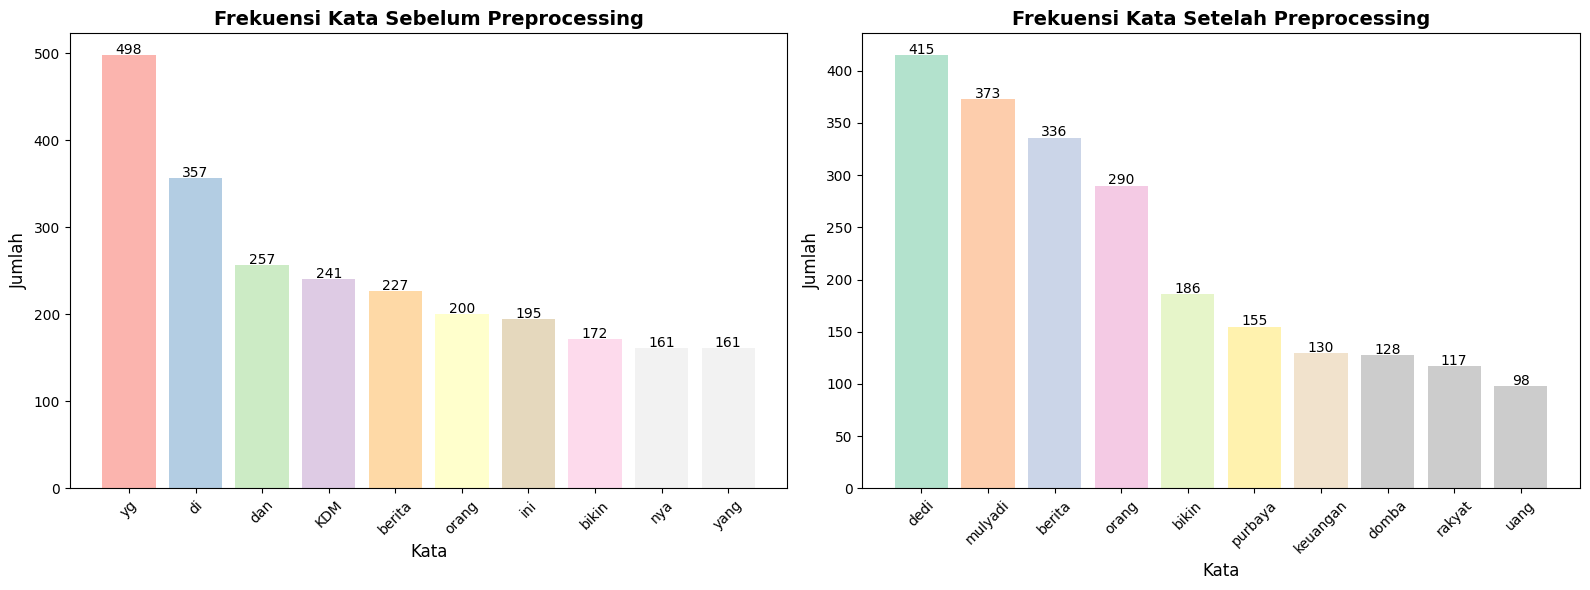

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import STOPWORDS

# Set stopwords tambahan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp', 'lu', 'deh', 'fyp', 'ya'])

# Fungsi helper untuk membersihkan tanda kutip, [ ], , dll
def clean_text_column(series):
    cleaned = []
    for text in series.astype(str):
        # Hapus [ ], tanda petik tunggal/ganda, koma
        text = re.sub(r"[\[\]\'\",]", "", text)
        cleaned.append(text.strip())
    return " ".join(cleaned)

# BEFORE: kolom
all_text_before = clean_text_column(df["text"])
words_before = all_text_before.split()
filtered_words_before = [word for word in words_before if word.lower() not in stopwords]
word_counts_before = Counter(filtered_words_before)
top_words_before = word_counts_before.most_common(10)
word_before, count_before = zip(*top_words_before)

# AFTER: kolom
all_text_after = clean_text_column(df["stopword removal"])
words_after = all_text_after.split()
filtered_words_after = [word for word in words_after if word.lower() not in stopwords]
word_counts_after = Counter(filtered_words_after)
top_words_after = word_counts_after.most_common(10)
word_after, count_after = zip(*top_words_after)

# Plot berdampingan
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# BEFORE Plot
colors_before = plt.cm.Pastel1(range(len(word_before)))
bars1 = axes[0].bar(word_before, count_before, color=colors_before)
axes[0].set_title("Frekuensi Kata Sebelum Preprocessing", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Kata", fontsize=12)
axes[0].set_ylabel("Jumlah", fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
for bar, count in zip(bars1, count_before):
    axes[0].text(bar.get_x() + bar.get_width()/2, count + 1, str(count), ha='center')

# AFTER Plot
colors_after = plt.cm.Pastel2(range(len(word_after)))
bars2 = axes[1].bar(word_after, count_after, color=colors_after)
axes[1].set_title("Frekuensi Kata Setelah Preprocessing", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Kata", fontsize=12)
axes[1].set_ylabel("Jumlah", fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
for bar, count in zip(bars2, count_after):
    axes[1].text(bar.get_x() + bar.get_width()/2, count + 1, str(count), ha='center')

plt.tight_layout()
plt.show()

In [ ]:
df.to_csv('Hasil_Preprocessing_Data.csv',encoding='utf8', index=False);

# ***PELEBALAN DATA METODE LAXICON BASED 3 CLASS***

In [ ]:
import pandas as pd

data = pd.read_csv("Hasil_Preprocessing_Data.csv")
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1392 entries, 0 to 1391
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   text              1391 non-null   object
 1   cleaning          1388 non-null   object
 2   case_folding      1388 non-null   object
 3   normalisasi       1386 non-null   object
 4   tokenize          1392 non-null   object
 5   stopword removal  1380 non-null   object
dtypes: object(6)
memory usage: 65.4+ KB


text  \
0  Santun dan berikanlah komen yg real.jgn mengad...   
1  Yg bikin berita salah.\nYg bikin berita pemben...   
2  Dua" nya orang Sunda \nDua" nya pemimpin yang ...   
3           Dua2nya orang hebat, Pak Purbaya dan KDM   
4  min sepertinya anglenya gak sejauh itu deh ......   

                                            cleaning  \
0  Santun dan berikanlah komen yg realjgn mengada...   
1  Yg bikin berita salah\nYg bikin berita pembenc...   
2  Dua nya orang Sunda \nDua nya pemimpin yang he...   
3             Duanya orang hebat Pak Purbaya dan KDM   
4  min sepertinya anglenya gak sejauh itu deh nor...   

                                        case_folding  \
0  santun dan berikanlah komen yg realjgn mengada...   
1  yg bikin berita salah\nyg bikin berita pembenc...   
2  dua nya orang sunda \ndua nya pemimpin yang he...   
3             duanya orang hebat pak purbaya dan kdm   
4  min sepertinya anglenya gak sejauh itu deh nor...   

                                         normalisasi  \
0  santun dan berikanlah komen yang realjgn menga...   
1  yang bikin berita salah yang bikin berita pemb...   
2  dua ya orang sunda dua ya pemimpin yang hebat ...   
3             duanya orang hebat pak purbaya dan kdm   
4  min sepertinya anglenya tidak sejauh itu deh n...   

                                            tokenize  \
0  ['santun', 'dan', 'berikanlah', 'komen', 'yang...   
1  ['yang', 'bikin', 'berita', 'salah', 'yang', '...   
2  ['dua', 'ya', 'orang', 'sunda', 'dua', 'ya', '...   
3  ['duanya', 'orang', 'hebat', 'pak', 'purbaya',...   
4  ['min', 'sepertinya', 'anglenya', 'tidak', 'se...   

                                    stopword removal  
0  santun berikanlah komen realjgn mengada adaked...  
1  bikin berita salah bikin berita pembenci dedi ...  
2  orang sunda pemimpin hebat jujur berharap pemi...  
3            duanya orang hebat purbaya dedi mulyadi  
4  min anglenya deh normal normal beritanya menda...

In [ ]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1380 entries, 0 to 1391
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   text              1380 non-null   object
 1   cleaning          1380 non-null   object
 2   case_folding      1380 non-null   object
 3   normalisasi       1380 non-null   object
 4   tokenize          1380 non-null   object
 5   stopword removal  1380 non-null   object
dtypes: object(6)
memory usage: 75.5+ KB


In [ ]:
data = pd.DataFrame(data[['stopword removal']])
data.head(5)

stopword removal
0  santun berikanlah komen realjgn mengada adaked...
1  bikin berita salah bikin berita pembenci dedi ...
2  orang sunda pemimpin hebat jujur berharap pemi...
3            duanya orang hebat purbaya dedi mulyadi
4  min anglenya deh normal normal beritanya menda...

In [ ]:
import pandas as pd
import requests

# Unduh kamus leksikon positif dan negatif dari GitHub
positive_url = "https://raw.githubusercontent.com/fajri91/InSet/master/positive.tsv"
negative_url = "https://raw.githubusercontent.com/fajri91/InSet/master/negative.tsv"

positive_lexicon = set(pd.read_csv(positive_url, sep="\t", header=None)[0])
negative_lexicon = set(pd.read_csv(negative_url, sep="\t", header=None)[0])

# Fungsi untuk menentukan sentimen dan menghitung skornya
def determine_sentiment(text):
    if isinstance(text, str):
        positive_count = sum(1 for word in text.split() if word in positive_lexicon)
        negative_count = sum(1 for word in text.split() if word in negative_lexicon)
        sentiment_score = positive_count - negative_count
        if sentiment_score > 0:
            sentiment = "Positif"
        elif sentiment_score < 0:
            sentiment = "Negatif"
        else:
            sentiment = "Netral"
        return sentiment_score, sentiment
    return 0, "Netral"


# Tentukan sentimen dan skor untuk setiap ulasan
data[['Polarity', 'Sentiment']] = data['stopword removal'].apply(lambda x: pd.Series(determine_sentiment(x)))

# Tampilkan hasilnya
data.head(20)


stopword removal  Polarity Sentiment
0   santun berikanlah komen realjgn mengada adaked...         0    Netral
1   bikin berita salah bikin berita pembenci dedi ...        -3   Negatif
2   orang sunda pemimpin hebat jujur berharap pemi...         0    Netral
3             duanya orang hebat purbaya dedi mulyadi         0    Netral
4   min anglenya deh normal normal beritanya menda...        -2   Negatif
5   kasihan dedipa dedi satunya gubernur membongka...        -2   Negatif
6   berita berita menjatuhkan badan pemeriksa keua...        -4   Negatif
7   pemimpin pejabat suka benturkan bermusuhan rak...        -1   Negatif
8        ngaruh dedi calon presiden pilih wkl purbaya         0    Netral
9           orang benturkansang pembenci tertawa puas         2   Positif
10  dedi mulyadi jabat gub jabar rugimungkin sisa ...        -1   Negatif
11                         pemeriksaan kinerja pidana         0    Netral
12                                            korupsi        -1   Negatif
13                                    allahada allaah         0    Netral
14                       semoga duanya bersatu rakyat        -1   Negatif
15                                  boikot jakartacom         0    Netral
16                                   goreng biar rame         0    Netral
17  media pencari viewer parah kayak domba berdua ...        -3   Negatif
18  berita benci dedi mulyadi purbaya kmd purbaya ...        -1   Negatif
19  habis terpenting buktinya daripadahabis korups...        -1   Negatif

/tmp/ipython-input-1009489280.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')


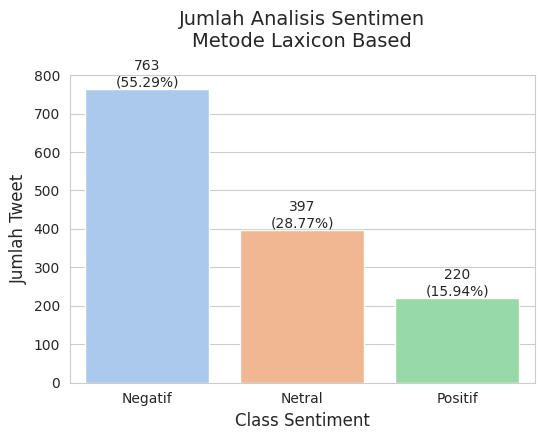

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_count = data['Sentiment'].value_counts()
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
plt.title('Jumlah Analisis Sentimen\nMetode Laxicon Based', fontsize=14, pad=20)
plt.xlabel('Class Sentiment', fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)

total = len(data['Sentiment'])

for i, count in enumerate(sentiment_count.values):
    percentage = f'{100 * count / total:.2f}%'
    ax.text(i, count + 0.10, f'{count}\n({percentage})', ha='center', va='bottom')

plt.show()

In [ ]:
data.to_csv('Hasil_Labelling_Data_3class.csv',encoding='utf8', index=False)

# ***WORDCLOUD***



In [ ]:
import pandas as pd

data = pd.read_csv("Hasil_Labelling_Data_3class.csv")
data.info()
data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1380 entries, 0 to 1379
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   stopword removal  1380 non-null   object
 1   Polarity          1380 non-null   int64 
 2   Sentiment         1380 non-null   object
dtypes: int64(1), object(2)
memory usage: 32.5+ KB


stopword removal  Polarity Sentiment
0  santun berikanlah komen realjgn mengada adaked...         0    Netral
1  bikin berita salah bikin berita pembenci dedi ...        -3   Negatif
2  orang sunda pemimpin hebat jujur berharap pemi...         0    Netral
3            duanya orang hebat purbaya dedi mulyadi         0    Netral
4  min anglenya deh normal normal beritanya menda...        -2   Negatif

In [ ]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1380 entries, 0 to 1379
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   stopword removal  1380 non-null   object
 1   Polarity          1380 non-null   int64 
 2   Sentiment         1380 non-null   object
dtypes: int64(1), object(2)
memory usage: 32.5+ KB


In [ ]:
data = pd.DataFrame(data[['stopword removal','Sentiment']])
data.head(5)

stopword removal Sentiment
0  santun berikanlah komen realjgn mengada adaked...    Netral
1  bikin berita salah bikin berita pembenci dedi ...   Negatif
2  orang sunda pemimpin hebat jujur berharap pemi...    Netral
3            duanya orang hebat purbaya dedi mulyadi    Netral
4  min anglenya deh normal normal beritanya menda...   Negatif

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Pisahkan dataset berdasarkan sentimen
sentimen_Neutral = data[data['Sentiment'] == 'Netral']['stopword removal'].str.cat(sep=' ')
sentimen_Negative = data[data['Sentiment'] == 'Negatif']['stopword removal'].str.cat(sep=' ')
sentimen_Positive = data[data['Sentiment'] == 'Positif']['stopword removal'].str.cat(sep=' ')

# Buat stopwords tambahan
stopwords = set(STOPWORDS)
stopwords.update([
    'https', 'co', 'RT', '...', 'amp', 'lu', 'deh','jokowi'])

# Buat wordcloud untuk masing-masing sentimen
wordcloud_neutral = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(sentimen_Neutral)
wordcloud_negative = WordCloud(width=800, height=400, background_color='black', colormap='Reds', stopwords=stopwords).generate(sentimen_Negative)
wordcloud_positive = WordCloud(width=800, height=400, background_color='white', colormap='Greens', stopwords=stopwords).generate(sentimen_Positive)

# Fungsi untuk membuat dan menampilkan WordCloud
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, random_state=42, max_font_size=100, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()


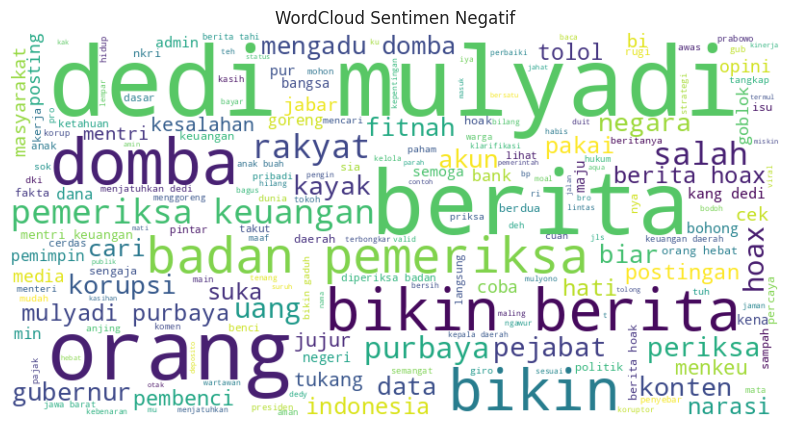

In [ ]:
# Membuat WordCloud untuk sentimen Negatif
create_wordcloud(sentimen_Negative, 'WordCloud Sentimen Negatif')

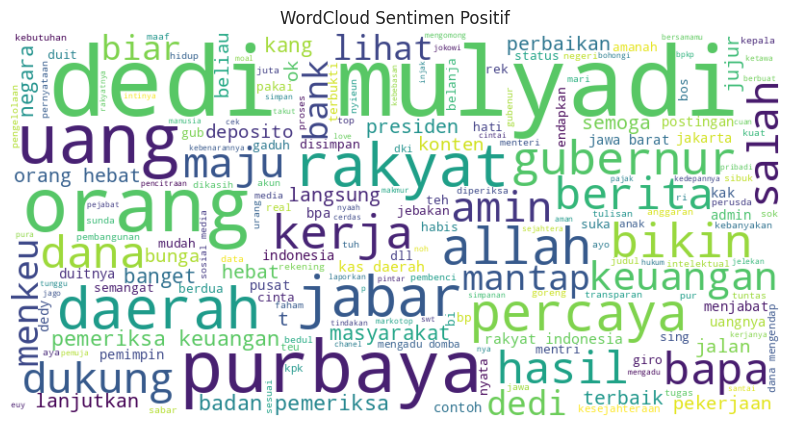

In [ ]:
# Membuat WordCloud untuk sentimen Positif
create_wordcloud(sentimen_Positive, 'WordCloud Sentimen Positif')

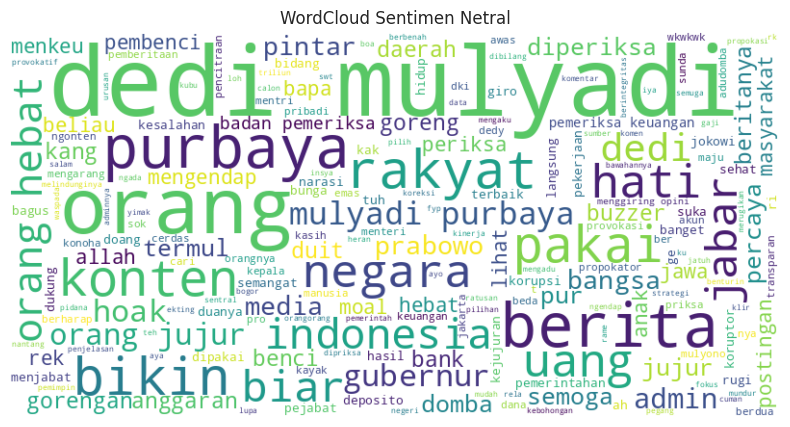

In [ ]:
# Membuat WordCloud untuk sentimen Netral
create_wordcloud(sentimen_Neutral, 'WordCloud Sentimen Netral')

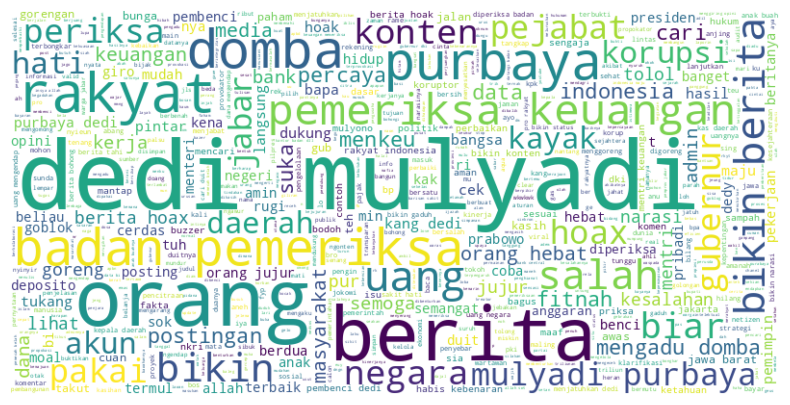

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Mengisi nilai NaN dengan string kosong ('')
data['stopword removal'] = data['stopword removal'].fillna('')

# Menggabungkan teks dari kolom
text = ' '.join(data['stopword removal'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp', 'lu', 'deh'])

wc = WordCloud(stopwords=stopwords, background_color="white", max_words=1000, width=800, height=400)

wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# ***FREKUENSI KATA***



In [ ]:
import pandas as pd

data = pd.read_csv("Hasil_Labelling_Data_3class.csv")
data.info()
data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1380 entries, 0 to 1379
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   stopword removal  1380 non-null   object
 1   Polarity          1380 non-null   int64 
 2   Sentiment         1380 non-null   object
dtypes: int64(1), object(2)
memory usage: 32.5+ KB


stopword removal  Polarity Sentiment
0  santun berikanlah komen realjgn mengada adaked...         0    Netral
1  bikin berita salah bikin berita pembenci dedi ...        -3   Negatif
2  orang sunda pemimpin hebat jujur berharap pemi...         0    Netral
3            duanya orang hebat purbaya dedi mulyadi         0    Netral
4  min anglenya deh normal normal beritanya menda...        -2   Negatif

In [ ]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1380 entries, 0 to 1379
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   stopword removal  1380 non-null   object
 1   Polarity          1380 non-null   int64 
 2   Sentiment         1380 non-null   object
dtypes: int64(1), object(2)
memory usage: 32.5+ KB


In [ ]:
data = pd.DataFrame(data[['stopword removal','Sentiment']])
data.head(5)

stopword removal Sentiment
0  erornya langsung eror menunggu aplikasi sebula...    Netral
1                                        cepat mudah   Positif
2                mudah dokumen tinggal cetak praktis   Positif
3                                pembuatan sayangkan   Negatif
4  daftar keperluan pindah penduduk kota daftar d...   Negatif

In [ ]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from collections import Counter

# Pisahkan dataset berdasarkan sentimen
sentimen_Neutral = data[data['Sentiment'] == 'Netral']['stopword removal'].str.cat(sep=' ')
sentimen_Negative = data[data['Sentiment'] == 'Negatif']['stopword removal'].str.cat(sep=' ')
sentimen_Positive = data[data['Sentiment'] == 'Positif']['stopword removal'].str.cat(sep=' ')

# Stopwords tambahan
stopwords = set(STOPWORDS)
stopwords.update([
    'https', 'co', 'RT', '...', 'amp', 'lu', 'deh'])

# Fungsi hitung frekuensi kata + tampilkan jumlah
def plot_word_freq(text, title, color):
    words = [w for w in text.split() if w not in stopwords]
    word_freq = Counter(words).most_common(10)  # ambil 10 kata teratas
    df_freq = pd.DataFrame(word_freq, columns=['Kata', 'Frekuensi'])

    plt.figure(figsize=(8,5))
    bars = plt.barh(df_freq['Kata'], df_freq['Frekuensi'], color=color)
    plt.gca().invert_yaxis()  # biar kata frekuensi tertinggi di atas
    plt.title(f"Top 10 Kata - Sentimen {title}", fontsize=14)
    plt.xlabel("Frekuensi")
    plt.ylabel("Kata")

    # Tambahkan label jumlah di ujung bar
    for bar in bars:
        plt.text(
            bar.get_width() + 0.2,  # posisi X sedikit ke kanan
            bar.get_y() + bar.get_height()/2,  # posisi Y di tengah bar
            str(int(bar.get_width())),  # nilai frekuensi
            va='center'
        )

    plt.show()

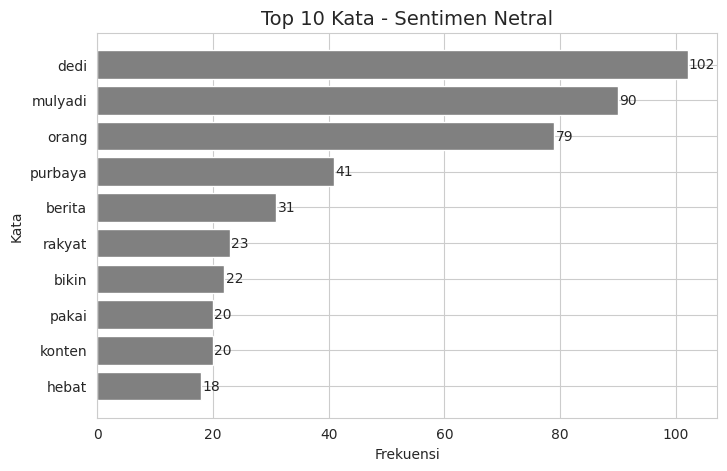

In [ ]:
plot_word_freq(sentimen_Neutral, "Netral", "gray")

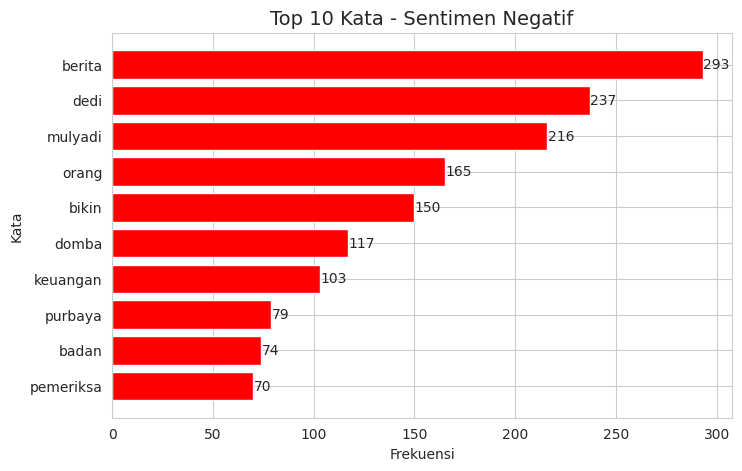

In [ ]:
plot_word_freq(sentimen_Negative, "Negatif", "red")

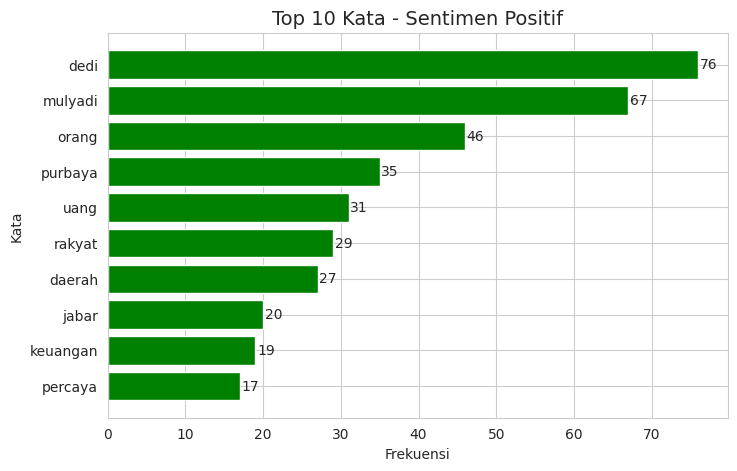

In [ ]:
plot_word_freq(sentimen_Positive, "Positif", "green")

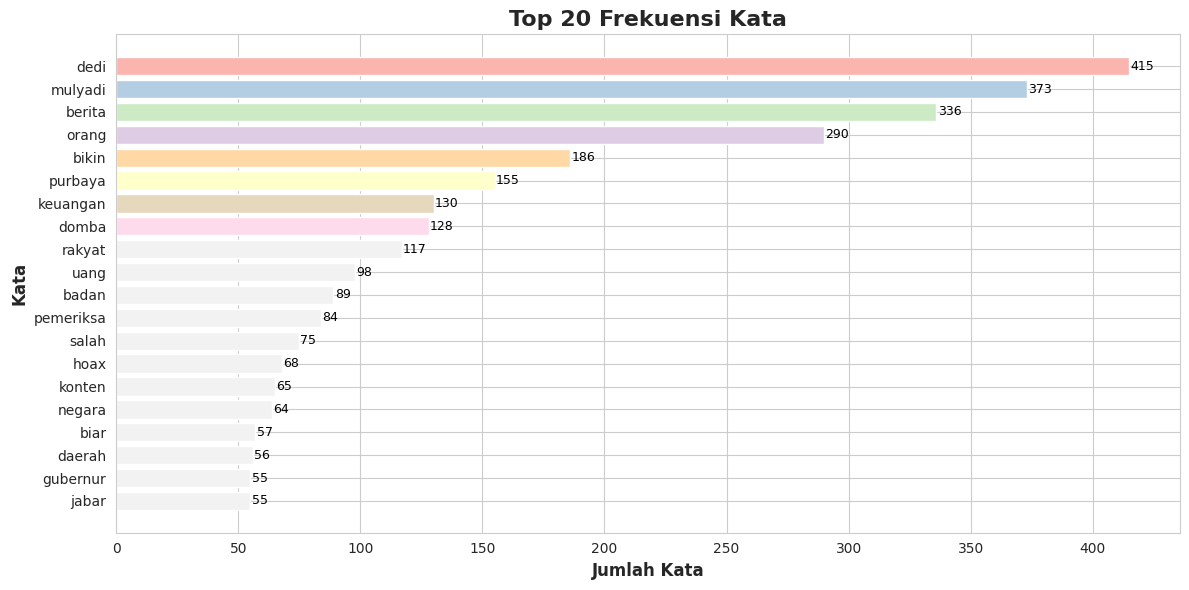

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Gabungkan semua teks
text = " ".join(data["stopword removal"])

tokens = text.split()
word_counts = Counter(tokens)

# Ambil 20 kata teratas
top_words = word_counts.most_common(20)
word, count = zip(*top_words)

# Palet warna soft (Pastel)
colors = plt.cm.Pastel1(range(len(word)))

plt.figure(figsize=(12, 6))
bars = plt.barh(word, count, color=colors)
plt.xlabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.ylabel("Kata", fontsize=12, fontweight='bold')
plt.title("Top 20 Frekuensi Kata", fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()  # Biar frekuensi tertinggi di atas

# Tambahkan angka di ujung bar
for bar, num in zip(bars, count):
    plt.text(num + 0.5, bar.get_y() + bar.get_height()/2,
             str(num), va='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()


# ***N-Gram Frekuensi Kata***



In [ ]:
import pandas as pd

data = pd.read_csv("Hasil_Labelling_Data_3class.csv")
data.info()
data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1380 entries, 0 to 1379
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   stopword removal  1380 non-null   object
 1   Polarity          1380 non-null   int64 
 2   Sentiment         1380 non-null   object
dtypes: int64(1), object(2)
memory usage: 32.5+ KB


stopword removal  Polarity Sentiment
0  santun berikanlah komen realjgn mengada adaked...         0    Netral
1  bikin berita salah bikin berita pembenci dedi ...        -3   Negatif
2  orang sunda pemimpin hebat jujur berharap pemi...         0    Netral
3            duanya orang hebat purbaya dedi mulyadi         0    Netral
4  min anglenya deh normal normal beritanya menda...        -2   Negatif

In [ ]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1380 entries, 0 to 1379
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   stopword removal  1380 non-null   object
 1   Polarity          1380 non-null   int64 
 2   Sentiment         1380 non-null   object
dtypes: int64(1), object(2)
memory usage: 32.5+ KB


In [ ]:
data = pd.DataFrame(data[['stopword removal','Sentiment']])
data.head(5)

stopword removal Sentiment
0  santun berikanlah komen realjgn mengada adaked...    Netral
1  bikin berita salah bikin berita pembenci dedi ...   Negatif
2  orang sunda pemimpin hebat jujur berharap pemi...    Netral
3            duanya orang hebat purbaya dedi mulyadi    Netral
4  min anglenya deh normal normal beritanya menda...   Negatif

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS

# Stopwords tambahan (bisa disesuaikan)
custom_stopwords = set(ENGLISH_STOP_WORDS)
custom_stopwords.update([
    'https', 'co', 'RT', '...', 'amp', 'lu', 'deh'])

# Fungsi buat ambil n-gram
def get_top_ngrams(corpus, n=3, top_k=10, stopwords=None):
    vec = CountVectorizer(ngram_range=(n, n), stop_words=stopwords).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:top_k]

# Fungsi buat plot frekuensi n-gram
def plot_ngrams(corpus, sentiment_label, color_map=plt.cm.Set2, stopwords=None):
    top_ngrams = get_top_ngrams(corpus, n=3, top_k=10, stopwords=stopwords)
    if not top_ngrams:
        print(f"Tidak ada trigram untuk sentimen {sentiment_label}")
        return

    ngrams, counts = zip(*top_ngrams)
    colors = color_map(range(len(ngrams)))

    plt.figure(figsize=(10,6))
    bars = plt.barh(ngrams, counts, color=colors)
    plt.gca().invert_yaxis()
    plt.title(f"Top 10 Trigram - Sentimen {sentiment_label}", fontsize=16, fontweight='bold')
    plt.xlabel("Jumlah Kemunculan", fontsize=12)
    plt.ylabel("Trigram", fontsize=12)

    # Tambahin label jumlah di ujung bar
    for bar, num in zip(bars, counts):
        plt.text(num + 0.01, bar.get_y() + bar.get_height()/2,
                 str(num), va='center', fontsize=11, color='black')

    plt.tight_layout()
    plt.show()


# Ambil data per sentimen
corpus_neg = data[data['Sentiment'] == 'Negatif']['stopword removal'].astype(str).tolist()
corpus_neu = data[data['Sentiment'] == 'Netral']['stopword removal'].astype(str).tolist()
corpus_pos = data[data['Sentiment'] == 'Positif']['stopword removal'].astype(str).tolist()

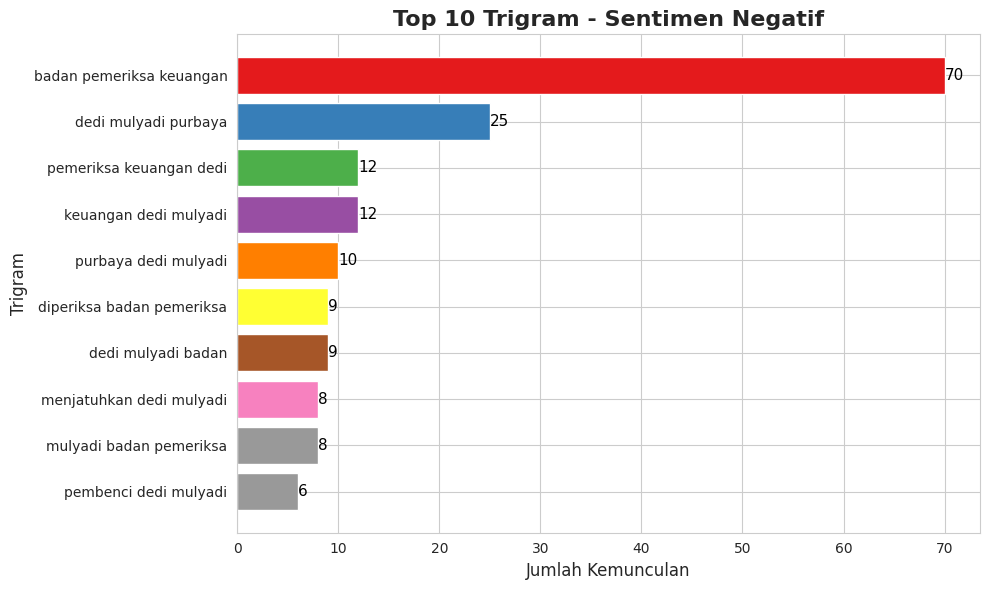

In [ ]:
plot_ngrams(corpus_neg, "Negatif", plt.cm.Set1)

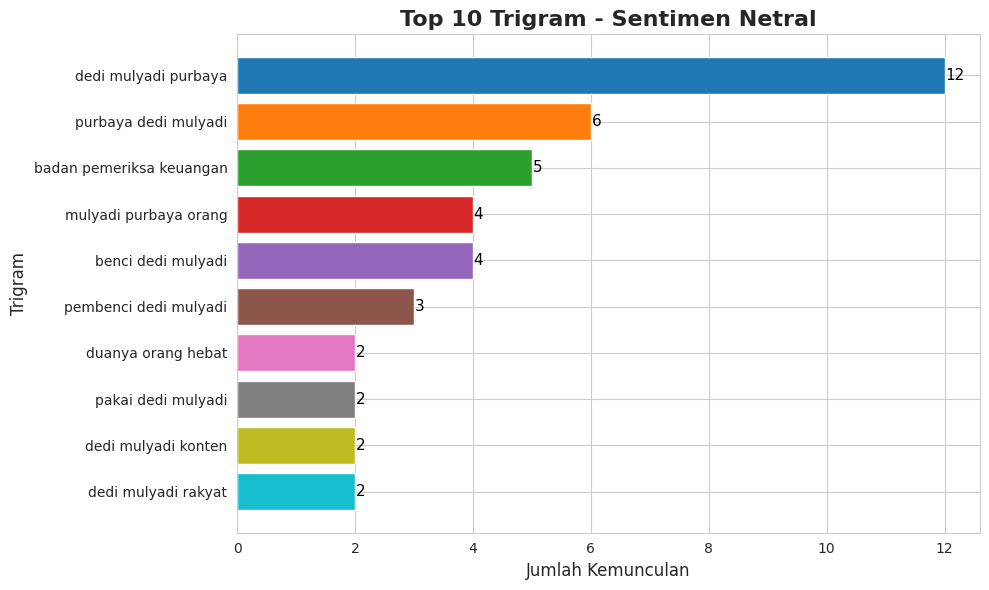

In [ ]:
plot_ngrams(corpus_neu, "Netral", plt.cm.tab10)

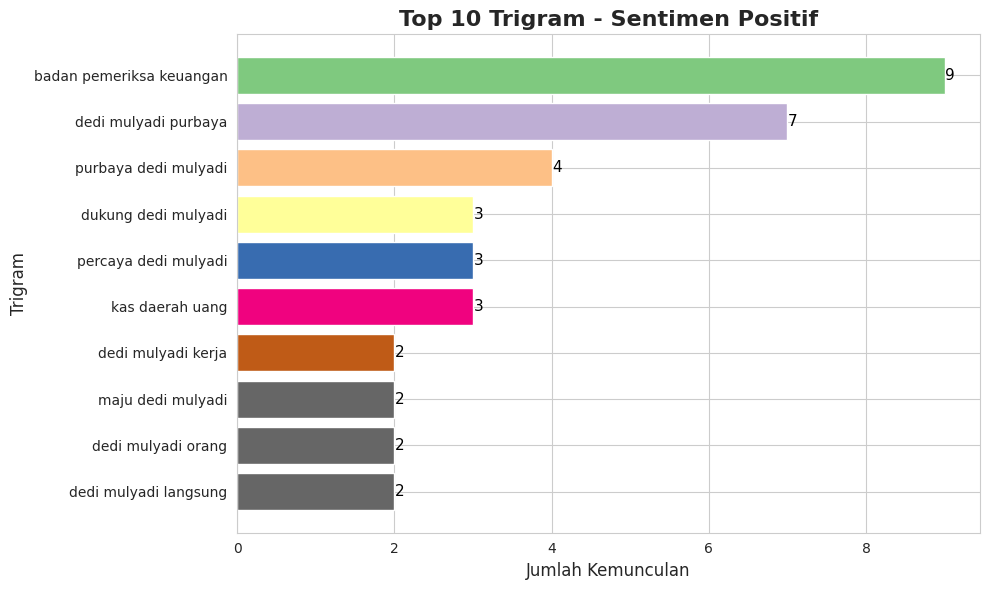

In [ ]:
plot_ngrams(corpus_pos, "Positif", plt.cm.Accent)

/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['rt'] not in stop_words.
  warnings.warn(


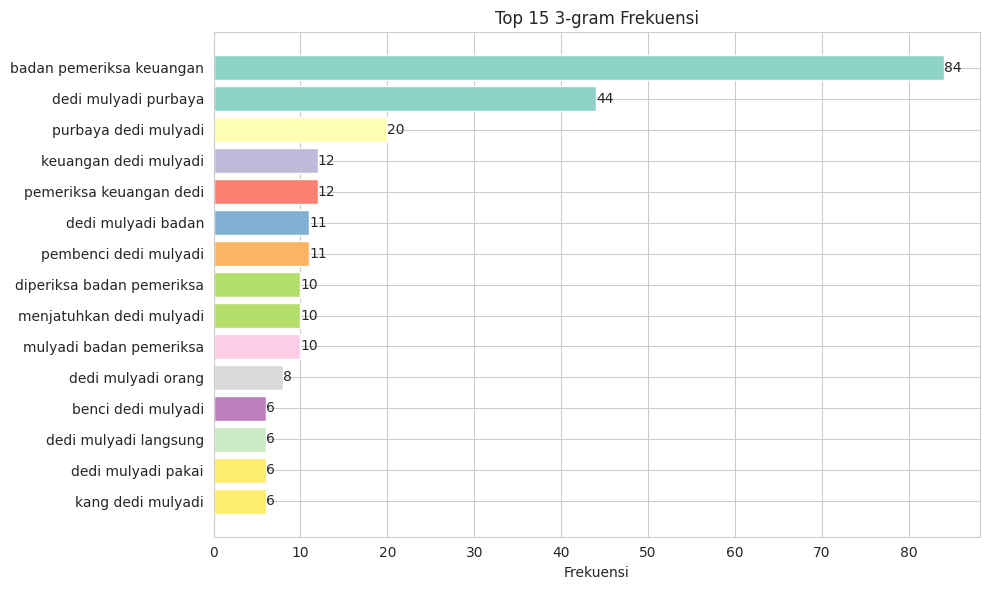

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# Daftar stopwords tambahan
custom_stopwords = ['https', 'co', 'RT', '...', 'amp', 'lu', 'deh','koruptor','ai','berapa','can']

# Fungsi untuk membuat diagram batang frekuensi n-gram
def plot_ngram_frequencies(texts, ngram_range=(3,3), top_n=15, cmap=plt.cm.Set3):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words=custom_stopwords)
    X = vectorizer.fit_transform(texts)

    # Hitung total frekuensi setiap n-gram
    ngram_counts = X.sum(axis=0).A1
    ngram_vocab = vectorizer.get_feature_names_out()
    freq_dist = dict(zip(ngram_vocab, ngram_counts))

    # Ambil n-gram dengan frekuensi tertinggi
    top_ngrams = Counter(freq_dist).most_common(top_n)
    labels, values = zip(*top_ngrams)

    # Buat warna berbeda untuk tiap bar
    colors = cmap(np.linspace(0, 1, len(labels)))

    # Visualisasi
    plt.figure(figsize=(10, 6))
    bars = plt.barh(labels[::-1], values[::-1], color=colors[::-1])
    plt.title(f'Top {top_n} {ngram_range[0]}-gram Frekuensi')
    plt.xlabel('Frekuensi')

    # Tambahkan label angka di ujung bar
    for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2, f'{width}', va='center')

    plt.tight_layout()
    plt.show()

# Contoh pemanggilan: Visualisasi 4-gram
plot_ngram_frequencies(data['stopword removal'], ngram_range=(3,3), top_n=15, cmap=plt.cm.Set3)

# ***ALGORITMA Decision Tree 80:20***

In [ ]:
# ===============================================
# 📊 Analisis Sentimen dengan Decision Tree
# ===============================================

# --- 1. Import library ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# --- 2. Load dataset ---
# Upload manual di Google Colab, lalu masukkan nama file di bawah
file_path = "Hasil_Labelling_Data_3class.csv"
df = pd.read_csv(file_path)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1380 entries, 0 to 1379
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   stopword removal  1380 non-null   object
 1   Polarity          1380 non-null   int64 
 2   Sentiment         1380 non-null   object
dtypes: int64(1), object(2)
memory usage: 32.5+ KB


stopword removal  Polarity Sentiment
0  santun berikanlah komen realjgn mengada adaked...         0    Netral
1  bikin berita salah bikin berita pembenci dedi ...        -3   Negatif
2  orang sunda pemimpin hebat jujur berharap pemi...         0    Netral
3            duanya orang hebat purbaya dedi mulyadi         0    Netral
4  min anglenya deh normal normal beritanya menda...        -2   Negatif

In [ ]:
# --- 3. Cek kolom yang tersedia ---
print("Kolom tersedia:", list(df.columns))

# Pastikan kolom sesuai
text_col = "stopword removal"
label_col = "Sentiment"

# --- 4. Bersihkan dan siapkan data ---
df = df[[text_col, label_col]].dropna().reset_index(drop=True)
df["stopword removal"] = df[text_col].astype(str)

# Encode label menjadi angka
le = LabelEncoder()
df["label_encoded"] = le.fit_transform(df[label_col].astype(str))

# --- 5. TF-IDF Vectorization ---
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X = vectorizer.fit_transform(df["stopword removal"])
y = df["label_encoded"]


Kolom tersedia: ['stopword removal', 'Polarity', 'Sentiment']


In [ ]:
# --- 6. Split data 80:20 ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# --- 7. Train model Decision Tree ---
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# --- 8. Prediksi ---
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=le.classes_, digits=4)

In [ ]:
# --- 9. Export hasil actual vs predicted ---
df_test = pd.DataFrame({
    "Text": vectorizer.inverse_transform(X_test)[0],
})
df_export = pd.DataFrame({
    "Actual": le.inverse_transform(y_test),
    "Predicted": le.inverse_transform(y_pred)
})
df_export.to_csv("hasil_actual_vs_predicted.csv", index=False)
print("✅ File hasil_actual_vs_predicted.csv berhasil disimpan.")

✅ File hasil_actual_vs_predicted.csv berhasil disimpan.


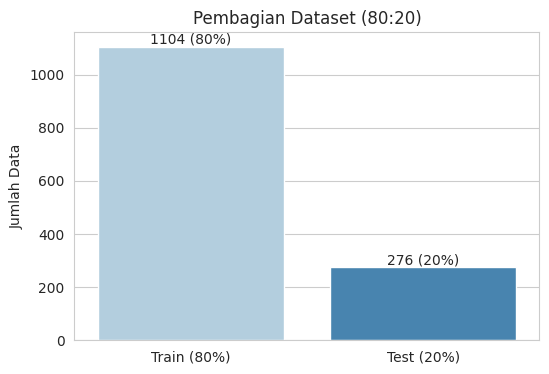

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

train_n = X_train.shape[0]
test_n  = X_test.shape[0]
total = train_n + test_n

labels = ["Train (80%)","Test (20%)"]
values = [train_n, test_n]
persen = [train_n/total*100, test_n/total*100]

plt.figure(figsize=(6,4))
ax = sns.barplot(
    x=labels,
    y=values,
    hue=labels,
    palette="Blues",
    legend=False
)

# Tambah anotasi
for i, v in enumerate(values):
    ax.text(i, v, f"{v} ({persen[i]:.0f}%)", ha='center', va='bottom')

plt.title("Pembagian Dataset (80:20)")
plt.ylabel("Jumlah Data")
plt.show()


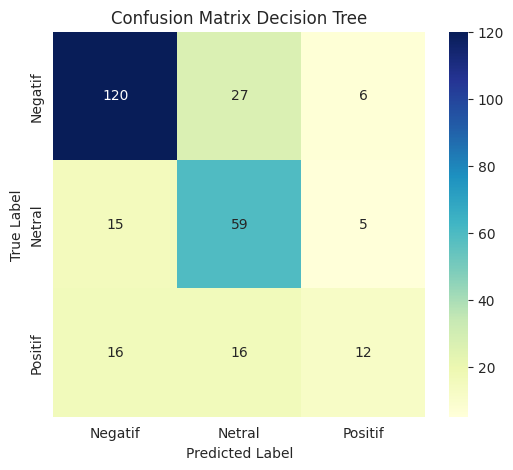

In [ ]:
# (2) Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Decision Tree")
plt.show()

In [ ]:
# (3) Classification Report & Akurasi
print("=== Classification Report ===")
print(report)
print(f"Akurasi: {acc:.4f}")
print(f"Akurasi: {acc*100:.2f}%")

=== Classification Report ===
              precision    recall  f1-score   support

     Negatif     0.7947    0.7843    0.7895       153
      Netral     0.5784    0.7468    0.6519        79
     Positif     0.5217    0.2727    0.3582        44

    accuracy                         0.6920       276
   macro avg     0.6316    0.6013    0.5999       276
weighted avg     0.6893    0.6920    0.6814       276

Akurasi: 0.6920
Akurasi: 69.20%


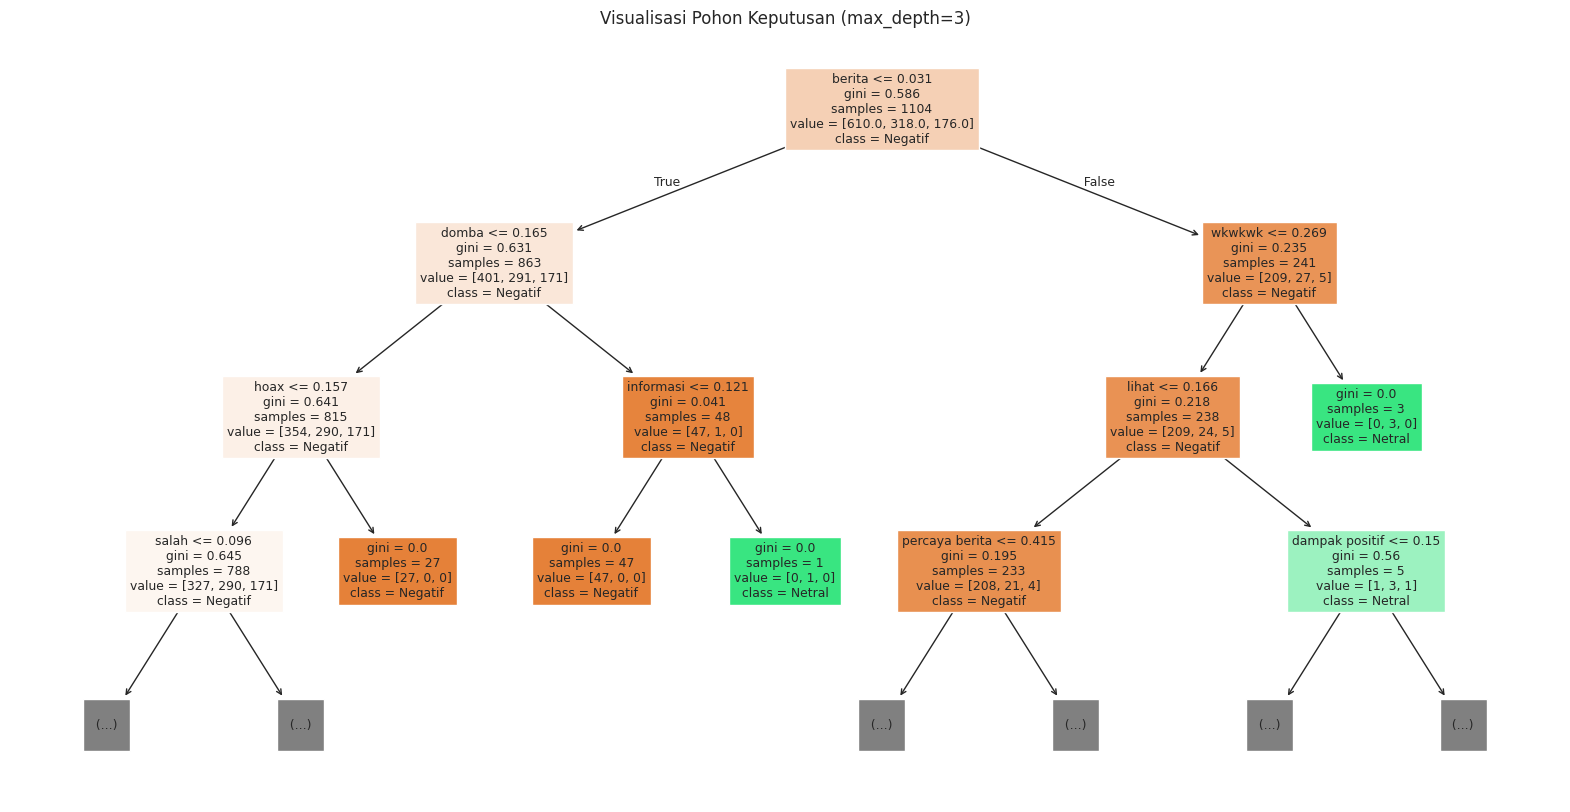

In [ ]:
# (4) Visualisasi Pohon Keputusan
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, class_names=le.classes_, feature_names=vectorizer.get_feature_names_out(), max_depth=3)
plt.title("Visualisasi Pohon Keputusan (max_depth=3)")
plt.show()

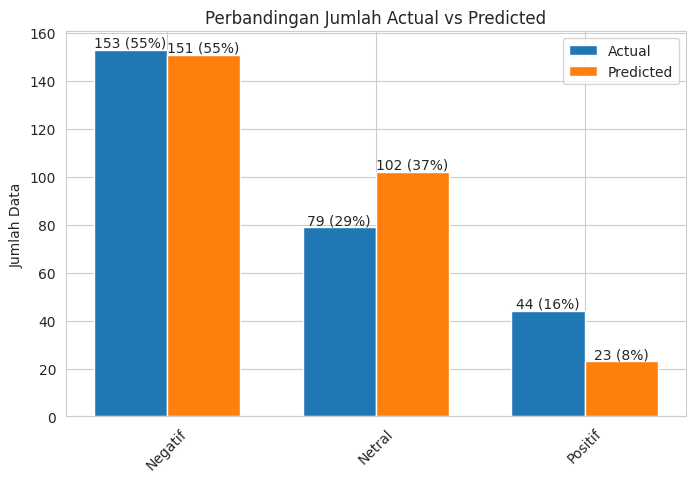

In [ ]:
# (5) Diagram perbandingan Actual vs Predicted
actual_counts = pd.Series(le.inverse_transform(y_test)).value_counts().sort_index()
pred_counts = pd.Series(le.inverse_transform(y_pred)).value_counts().reindex(actual_counts.index, fill_value=0)

x = np.arange(len(actual_counts))
width = 0.35

plt.figure(figsize=(8,5))
bars1 = plt.bar(x - width/2, actual_counts.values, width, label="Actual")
bars2 = plt.bar(x + width/2, pred_counts.values, width, label="Predicted")

plt.xticks(x, actual_counts.index, rotation=45)
plt.ylabel("Jumlah Data")
plt.title("Perbandingan Jumlah Actual vs Predicted")
plt.legend()

# -------- Tambah anotasi satu baris seperti contoh --------
total_actual = actual_counts.sum()
total_pred   = pred_counts.sum()

for bar, val in zip(bars1, actual_counts.values):
    pct = val/total_actual*100
    plt.text(bar.get_x()+bar.get_width()/2, bar.get_height(),
             f"{val} ({pct:.0f}%)", ha='center', va='bottom')

for bar, val in zip(bars2, pred_counts.values):
    pct = val/total_pred*100 if total_pred>0 else 0
    plt.text(bar.get_x()+bar.get_width()/2, bar.get_height(),
             f"{val} ({pct:.0f}%)", ha='center', va='bottom')

plt.show()

# ***SVM, KNN, Naive Bayes, Random Forest, Decision Tree, Neural Network***

In [ ]:
import pandas as pd

file_path = 'Hasil_Labelling_Data_3class.csv'
data = pd.read_csv(file_path)

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1380 entries, 0 to 1379
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   stopword removal  1380 non-null   object
 1   Polarity          1380 non-null   int64 
 2   Sentiment         1380 non-null   object
dtypes: int64(1), object(2)
memory usage: 32.5+ KB


stopword removal  Polarity Sentiment
0  santun berikanlah komen realjgn mengada adaked...         0    Netral
1  bikin berita salah bikin berita pembenci dedi ...        -3   Negatif
2  orang sunda pemimpin hebat jujur berharap pemi...         0    Netral
3            duanya orang hebat purbaya dedi mulyadi         0    Netral
4  min anglenya deh normal normal beritanya menda...        -2   Negatif

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

cleaned_data = data.dropna(subset=['stopword removal'])

X = cleaned_data['stopword removal']
y = cleaned_data['Sentiment']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Jumlah data latih:", len(X_train))
print("Jumlah data uji:", len(X_test))
print('===========================')



Jumlah data latih: 1104
Jumlah data uji: 276


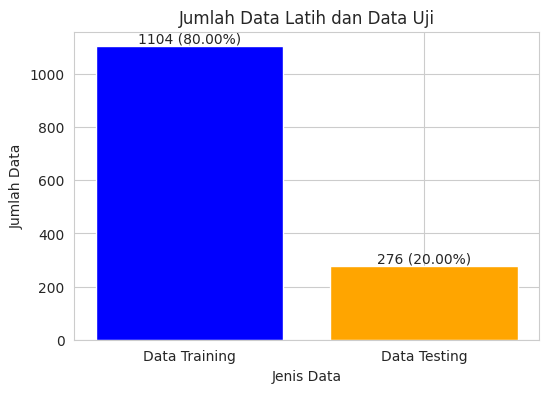

In [ ]:
import matplotlib.pyplot as plt


train_size = len(X_train)
test_size = len(X_test)

plt.figure(figsize=(6, 4))
bars = plt.bar(['Data Training', 'Data Testing'], [train_size, test_size], color=['blue', 'orange'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height} ({height / (train_size + test_size) * 100:.2f}%)',
             ha='center', va='bottom')

plt.title('Jumlah Data Latih dan Data Uji')
plt.xlabel('Jenis Data')
plt.ylabel('Jumlah Data')
plt.show()


In [ ]:
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

X_train_vec.shape, X_test_vec.shape

print("Jumlah fitur (kolom) setelah vektorisasi:", X_train_vec.shape[1])
print("Jumlah fitur (kolom) setelah vektorisasi:", X_test_vec.shape[1])

Jumlah fitur (kolom) setelah vektorisasi: 3322
Jumlah fitur (kolom) setelah vektorisasi: 3322


In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, SpatialDropout1D
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Initialize models
models = {
    "SVM": SVC(kernel='linear', random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100),
    "Decision Trees": DecisionTreeClassifier(random_state=42),
    "Neural Network": MLPClassifier(random_state=42, hidden_layer_sizes=(100,), max_iter=500),
}

# Train models
results = {}
for model_name, model in models.items():
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)
    results[model_name] = {
        "accuracy": accuracy_score(y_test, y_pred),
        "classification_report": classification_report(y_test, y_pred, output_dict=True),
        "confusion_matrix": confusion_matrix(y_test, y_pred)
    }


Confusion Matrix for SVM:


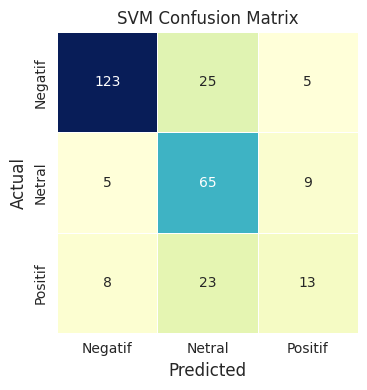


Confusion Matrix for KNN:


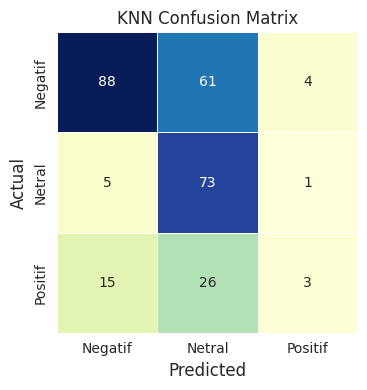


Confusion Matrix for Naive Bayes:


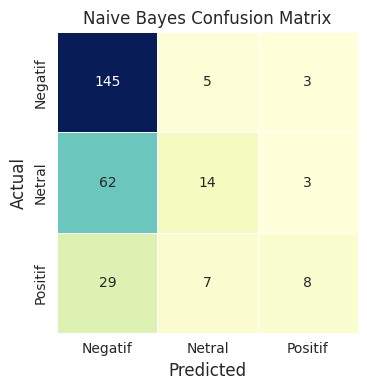


Confusion Matrix for Random Forest:


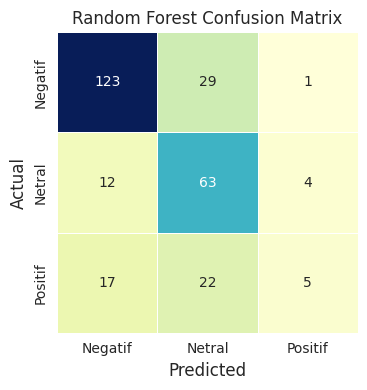


Confusion Matrix for Decision Trees:


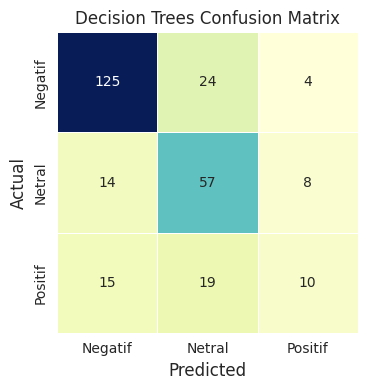


Confusion Matrix for Neural Network:


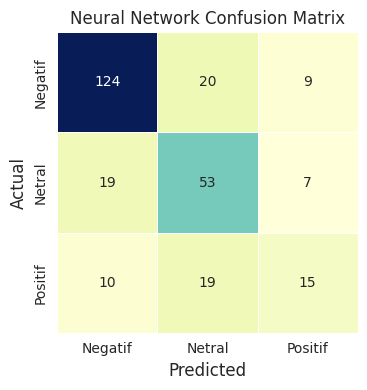

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for model_name, result in results.items():
    fig, ax = plt.subplots(figsize=(4, 4))
    sns.heatmap(
        result["confusion_matrix"],
        annot=True,
        fmt='d',
        cmap="YlGnBu",
        cbar=False,
        xticklabels=['Negatif','Netral','Positif'],
        yticklabels=['Negatif','Netral','Positif'],
        ax=ax,
        square=True,
        linewidths=0.5
    )
    print(f"\nConfusion Matrix for {model_name}:")
    ax.set_title(f"{model_name} Confusion Matrix", fontsize=12)
    ax.set_xlabel("Predicted", fontsize=12)
    ax.set_ylabel("Actual", fontsize=12)


    plt.tight_layout()
    plt.show()


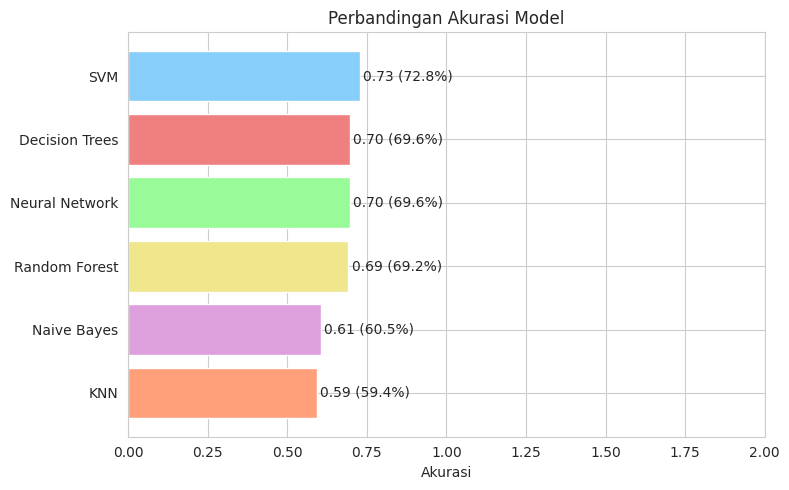

In [ ]:
import matplotlib.pyplot as plt

# Urutkan berdasarkan nilai akurasi (dari besar ke kecil)
accuracies = {model: result['accuracy'] for model, result in results.items()}
sorted_accuracies = dict(sorted(accuracies.items(), key=lambda item: item[1], reverse=True))

# Warna terang cerah (bright colors)
bright_colors = [
    'lightskyblue', 'lightcoral', 'palegreen', 'khaki',
    'plum', 'lightsalmon', 'mediumturquoise', 'wheat'
]

# Sesuaikan jumlah warna dengan jumlah model
num_models = len(sorted_accuracies)
colors = bright_colors[:num_models] if num_models <= len(bright_colors) else bright_colors * (num_models // len(bright_colors) + 1)

plt.figure(figsize=(8, 5))

# Buat bar horizontal dengan warna terang
bars = plt.barh(
    list(sorted_accuracies.keys()),
    list(sorted_accuracies.values()),
    color=colors[:num_models]
)

# Tambahkan nilai akurasi di setiap bar
for bar in bars:
    accuracy = bar.get_width()
    plt.text(
        accuracy + 0.01,
        bar.get_y() + bar.get_height() / 2,
        f'{accuracy:.2f} ({accuracy * 100:.1f}%)',
        va='center',
        fontsize=10
    )

plt.title("Perbandingan Akurasi Model")
plt.xlabel("Akurasi")
plt.xlim(0, 2)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [ ]:
from IPython.display import display

for model_name, result in results.items():
    print(f"\nClassification Report for {model_name}:")

    report_df = pd.DataFrame(result['classification_report']).transpose()

    styled_df = report_df.style.background_gradient(cmap="coolwarm")
    styled_df = styled_df.format(precision=3)
    display(styled_df)


Classification Report for SVM:



Classification Report for KNN:



Classification Report for Naive Bayes:



Classification Report for Random Forest:



Classification Report for Decision Trees:



Classification Report for Neural Network:
